$\qquad$ $\qquad$$\qquad$  **TDA 231 Machine Learning: Home Assignment 5 -- Clustering** <br />
$\qquad$ $\qquad$$\qquad$ **Goal: K-means (Yuchong), GMM (Divya), EM (Divya)**<br />
$\qquad$ $\qquad$$\qquad$                   **Grader: Yuchong, Divya** <br />
$\qquad$ $\qquad$$\qquad$                     **Due Date: 29th May** <br />
$\qquad$ $\qquad$$\qquad$                   **Submitted by: Name, Personal No., Email** <br />


---


General guidelines:
*   All solutions to theoretical and pratical problems must be submitted in this ipynb notebook, and equations wherever required, should be formatted using LaTeX math-mode.
*   All discussion regarding practical problems, along with solutions and plots should be specified in this notebook. All plots/results should be visible such that the notebook do not have to be run. But the code in the notebook should reproduce the plots/results if we choose to do so.
*   Your name, personal number and email address should be specified above.
*   All tables and other additional information should be included in this notebook.
*   **All the answers for theoretical questions must be filled in the cells created for you with "Your answer here" below each question, but feel free to add more cells if needed.**
*   Before submitting, make sure that your code can run on another computer. That all plots can show on another computer including all your writing. It is good to check if your code can run here: https://colab.research.google.com.


# Practical problems

The follwing code might be useful for this excercise.

```python
import scipy.io
mat = scipy.io.loadmat('hw5_p1a.mat')
print (mat.keys())
X = mat['X']
```

## [K-Means Implementation, 8 points]

Q 1.1. Implement the basic (linear) $k$-means algorithm as described in the lecture, using the euclidean distance. Use (uniformly) random points from the data as initialization for the centroids. Terminate the iterative procedure when the the cluster assignments do not change. [**4 pts**]

Q 1.2. Run your implementation on the matrix $X$ in **hw5_p1a.mat** with $k=2$. Each row of the matrix is an observation, and each column is a feature. Store the cluster assignment both after 2 iterations, and at convergence. Produce a scatter plot of the data with colors indicating the cluster assignments at convergence and highlight points that have changed assignment after the second iteration. [**4 pts**]

Number of iterations: 6.


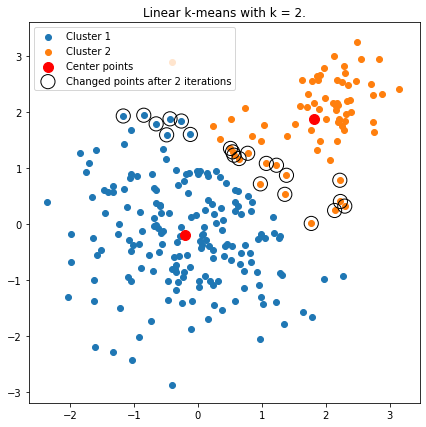

In [38]:
import scipy.io
import numpy as np
import itertools
import matplotlib.pyplot as plt
import math
import copy

def k_means(X, k, no_convergence = True):
    # Initialize centroids
    centroids=X[np.random.choice(n, size=k, replace=False)]
    
    # Initialize binary indicator varibable
    z = np.zeros((n, len(centroids)))
    
    distance = np.zeros((n, len(centroids)))
    iterations = 0
    assignment_2iter = []

    while True:
        if iterations == 2:
            #save assignments after 2 iterations
            assignment_2iter = copy.deepcopy(z)

        # Save prev Z to see if the assignments has changed 
        z_prev = copy.deepcopy(z)

        # Each object is assigned to its closest cluster
        for i in range(n):
            for j in range(len(centroids)):
                distance[i,j] = np.sqrt((X[i,0] - centroids[j,0])**2 + (X[i,1] - centroids[j,1])**2)
                z[i,j] = int(np.argmin(distance[i]) == j ) #for each data points with smallest distance assign to closest centroid j

        # Updating centroids
        for i in range(len(centroids)):
            numerator = 0
            for j in range(n):
                numerator += z[j,i] * X[j,:]
            centroids[i] = numerator/(np.sum(z[:,i]))

        # Break while loop if the assignments has converged
        if np.array_equal(z_prev, z):
            break

        iterations += 1        
  
    plt.figure(figsize=(7,7))
    
    # clusters after convergence
    legend = []
    for j in range(len(centroids)):
        cluster = [b for b, l in enumerate(z[:,j]) if l == 1] #list compression
        plt.scatter(X[cluster, 0], X[cluster, 1])
        cluster_legend = ("Cluster %i" % (j+1))
        legend.append(cluster_legend)

    # centroids after convergence
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red',s=100)
    legend.append("Center points")
    
    # Finding the changed points between iteration 2 and the iteration that gave convergence
    if(no_convergence):     
        change = [b for b, l in enumerate(np.abs(z-assignment_2iter)) if sum(l) != 0]
        plt.scatter(X[change, 0], X[change, 1],s=200, facecolors='none', edgecolors='k')
        legend.append("Changed points after 2 iterations")
    
   
    print("Number of iterations: %i." % iterations)
    
    plt.title("Linear k-means with k = %i." % k)
    plt.legend(legend)
    plt.show()
  

mat = scipy.io.loadmat('hw5_p1a.mat')
X = mat['X']

n = np.size(X,0)


k=2
k_means(X,k)


#### Your answer here:

# GMM [4 pts]

We will now consider mixture model. The probability of an observation $x \in \mathbb{R}^D$ is given by: $$p(x) = \sum_{k=1}^{K} \pi_k P(x|\theta_k)$$ where $\pi_k$ are the probabilities a priori and $P(x|\theta_k)$ are multi-dimensional Gaussian characterized by their mean $\mu_k$ and their co-variance matrix $\Sigma_k$
, i.e. $\theta_k = (\mu_k, \Sigma_k)$.

### Q 2.1.
Plot the probability distribution $p(x)$ for D=1 , K = 2, $\pi_1 = \pi_2 = 0.5$ and $\mu_1 = 1$, $\mu_2 = 3$,$\Sigma_1 = 1$,$ \Sigma_2 = 10$. **[2 pts]**

### Q 2.2.

What is the posterior probability that an example $x=1.5$ was produced by the Gaussian $k=1$,i.e. $P(\theta_1| x)$ ? **[2 pts]**

### Your answer here:

# EM algorithm for GMM [8 pts]

Assume that the property prices of Gotheburg follow a mixture of 2 Gaussians, of respective parameters $(\mu_1, \sigma_1^2)$ and $(\mu_2, \sigma_2^2)$.

The table below lists the prices in million SEK of some real estate transactions:
$$\begin{array}{|c|c|c|c|}
\hline
8& 1 & 4 & 3 & 4 & 5 & 7 & 5 & 3 & 5 \\ \hline
\end{array}$$

We will call $\pi_1$ and $\pi_2$ the coefficients of the two Gaussians in the mixture. Note: $\theta^{i}$ denotes $i^{th}$ step estimate when using EM algorithm.

### Q 3.1.

Sort the items of the sample in ascending order and use the 5 smallest values for
estimating $(\mu_1, \sigma_1^2)$ and 5 larger ones to estimate $(\mu_2, \sigma_2^2)$. Under these conditions, what values should logically be assigned to the weights $\pi_1$ and $\pi_2$? **[2 pts]**

### Q 3.2.

Starting from $\theta^0 = \{\mu_1, \sigma^2_1, \pi_1, \mu_2, \sigma^2_2, \pi_2\}$ obtained from the previous question, estimate the value of responsibilities $\gamma(z_{nk})$ according to the EM algorithm. **[3 pts]**

### Q 3.3.
Re-estimate the parameters i.e. calculate $\theta^1$, using the current responsibilities.**[3 pts]**

### Your answer here: